# Introduction to Regression with ```statsmodels``` in Python

## Chapter 3: Assessing model fit

In [1]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ad_conversion = pd.read_csv("ad_conversion.csv")
ad_conversion

,spent_usd,n_impressions,n_clicks
0,1.430000,7350,1
1,1.820000,17861,2
2,1.250000,4259,1
3,1.290000,4133,1
4,4.770000,15615,3
...,...,...,...
931,358.189997,1129773,252
932,173.880003,637549,120
933,40.289999,151531,28
934,198.710001,790253,135


In [3]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

In [4]:
mdl_click_vs_impression_orig = ols("n_clicks ~ n_impressions", data=ad_conversion).fit()
mdl_click_vs_impression_trans = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()

In [5]:
# # Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())
# # Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:54:07   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [6]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


The transformed model has a higher coefficient of determination than the original model, suggesting that it gives a better fit to the data.

In [7]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mdl_click_vs_impression_orig.mse_resid)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mdl_click_vs_impression_trans.mse_resid)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875727


 RSE is a measure of accuracy for regression models. It even works on other other statistical model types like regression trees, so you can compare accuracy across different classes of models.

Text(0, 0.5, 'Residuals')

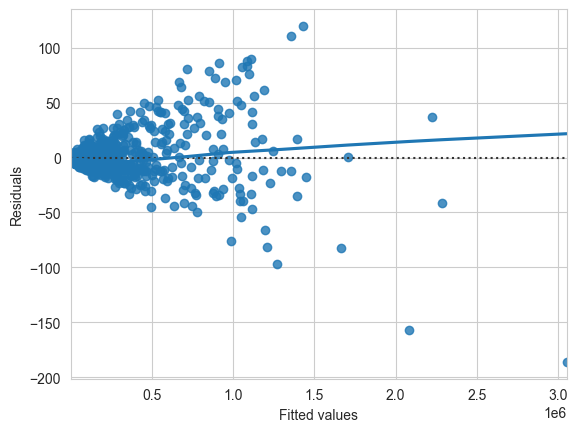

In [8]:
sns.residplot(x="n_impressions", y="n_clicks", data=ad_conversion, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

Text(0, 0.5, 'Residuals')

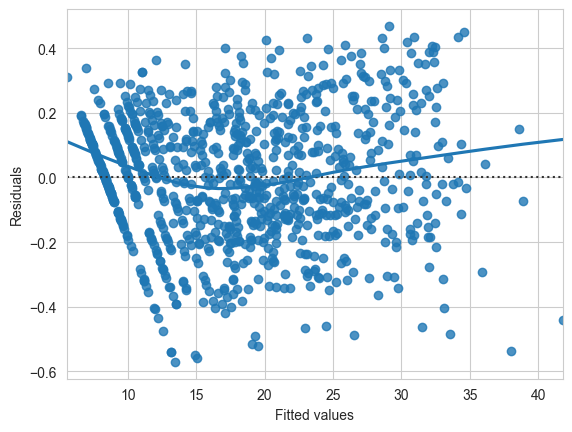

In [9]:
sns.residplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

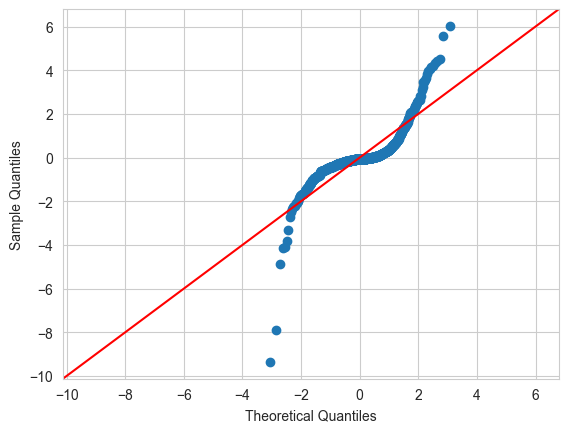

In [10]:
qq_orig = qqplot(data=mdl_click_vs_impression_orig.resid, fit=True, line="45")

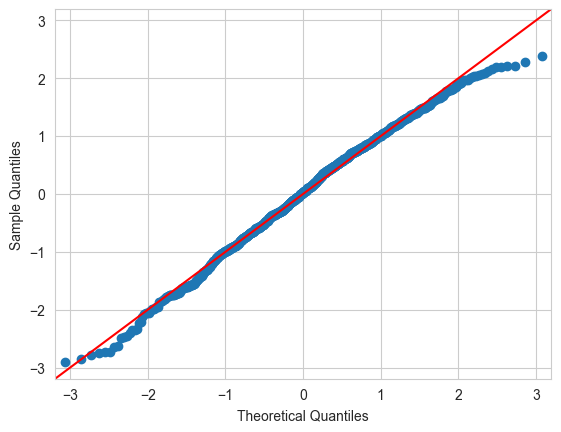

In [11]:
qq_trans = qqplot(data=mdl_click_vs_impression_trans.resid, fit=True, line="45")

Text(0, 0.5, 'Sqrt of abs val of stdized residuals')

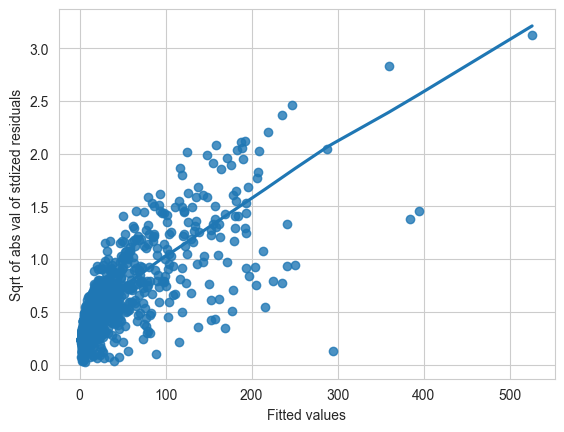

In [12]:
model_norm_residuals = mdl_click_vs_impression_orig.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
scale_loc = sns.regplot(x=mdl_click_vs_impression_orig.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

In [13]:
taiwan_real_estate = pd.read_csv("taiwan_real_estate2.csv")
taiwan_real_estate

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847
...,...,...,...,...
409,4082.01500,0,0 to 15,4.659607
410,90.45606,9,0 to 15,15.128593
411,390.96960,7,15 to 30,12.284418
412,104.81010,5,0 to 15,15.885023


In [14]:
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)
mdl_price_vs_conv = mdl_price_vs_conv.fit()

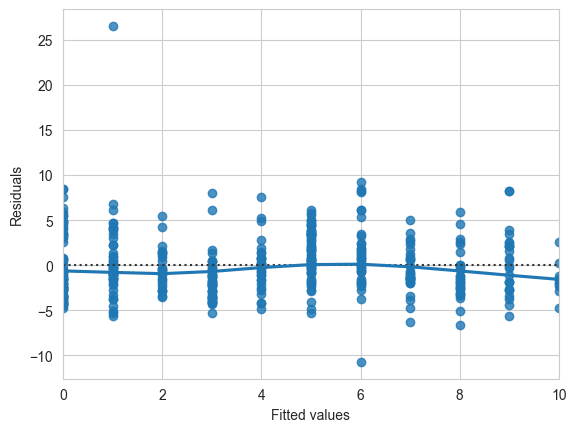

In [15]:
# Plot the residuals vs. fitted values
sns.residplot(x="n_convenience", y="price_twd_msq", data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

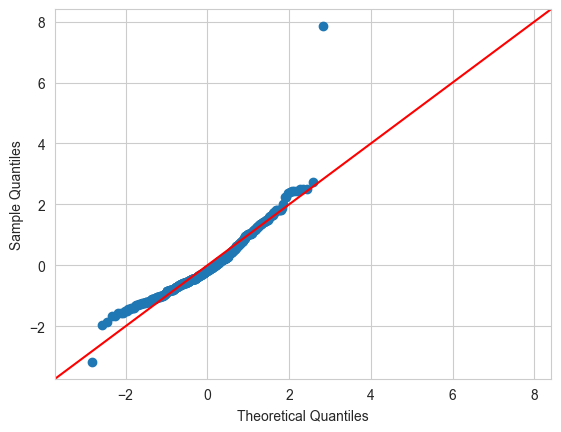

In [16]:
# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

In [17]:
# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

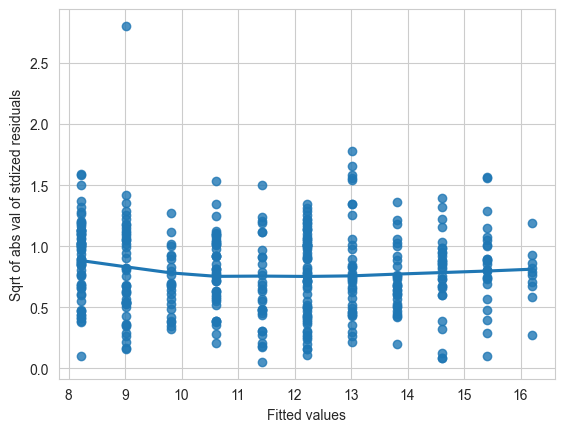

In [18]:
# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

#### Leverage
Leverage measures how unusual or extreme the explanatory variables are for each observation. Very roughly, high leverage means that the explanatory variable has values that are different from other points in the dataset. In the case of simple linear regression, where there is only one explanatory value, this typically means values with a very high or very low explanatory value.

 Highly leveraged points are the ones with explanatory variables that are furthest away from the others.

#### Influence
Influence measures how much a model would change if each observation was left out of the model calculations, one at a time. That is, it measures how different the prediction line would look if you would run a linear regression on all data points except that point, compared to running a linear regression on the whole dataset.

The standard metric for influence is Cook's distance, which calculates influence based on the residual size and the leverage of the point.

In [48]:
taiwan_real_estate = pd.read_csv("taiwan_real_estate2.csv")

# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

print(mdl_price_vs_dist.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     469.7
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           4.55e-70
Time:                        00:54:17   Log-Likelihood:                -1015.3
No. Observations:                 414   AIC:                             2035.
Df Residuals:                     412   BIC:                             2043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             16.7098      0

In [20]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Sort taiwan_real_estate by leverage in descending order and print the head
print(taiwan_real_estate.sort_values("leverage", ascending=False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
347       6488.021              1        15 to 30       3.388805   
116       6396.283              1        30 to 45       3.691377   
249       6306.153              1        15 to 30       4.538578   
255       5512.038              1        30 to 45       5.264750   
8         5512.038              1        30 to 45       5.688351   

     sqrt_dist_to_mrt_m  leverage  
347           80.548253  0.026665  
116           79.976765  0.026135  
249           79.411290  0.025617  
255           74.243101  0.021142  
8             74.243101  0.021142  


In [49]:
# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan_real_estate.sort_values("cooks_dist", ascending=False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
270       252.5822              1         0 to 15      35.552194   
148      3780.5900              0        15 to 30      13.645991   
228      3171.3290              0         0 to 15      14.099849   
220       186.5101              9        30 to 45      23.691377   
113       393.2606              6         0 to 15       2.299546   

     sqrt_dist_to_mrt_m  cooks_dist  
270           15.892835    0.115549  
148           61.486503    0.052440  
228           56.314554    0.035384  
220           13.656870    0.025123  
113           19.830799    0.022813  
